# Edubridge India: EXL Associate Data Analytics Training
## Name: Sukhpal
## Batch : 2021-5477
## Enrollment Number : EBEON0421366907
## Project 2: Restaurant Revenue Prediction
- Predict annual restaurant sales based on objective measurements

### Dataset Information
- The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

### Data fields
1. Id : Restaurant id. 
2. Open Date : opening date for a restaurant
3. City : City that the restaurant is in. Note that there are unicode in the names. 
4. City Group: Type of the city. Big cities, or Other. 
5. Type: Type of the restaurant. FC: Food Court, 
6. IL: Inline, DT: Drive Thru, MB: Mobile
7. P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
8. Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
# First Five Rows
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
# Last Five Rows
train.tail()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0
136,136,09/01/2009,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,6363241.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [6]:
# Checking Null Entries
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [7]:
# Unique entries in each variable
train.nunique()

Id            137
Open Date     134
City           34
City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
revenue       137
dtype: int64

In [8]:
train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [9]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


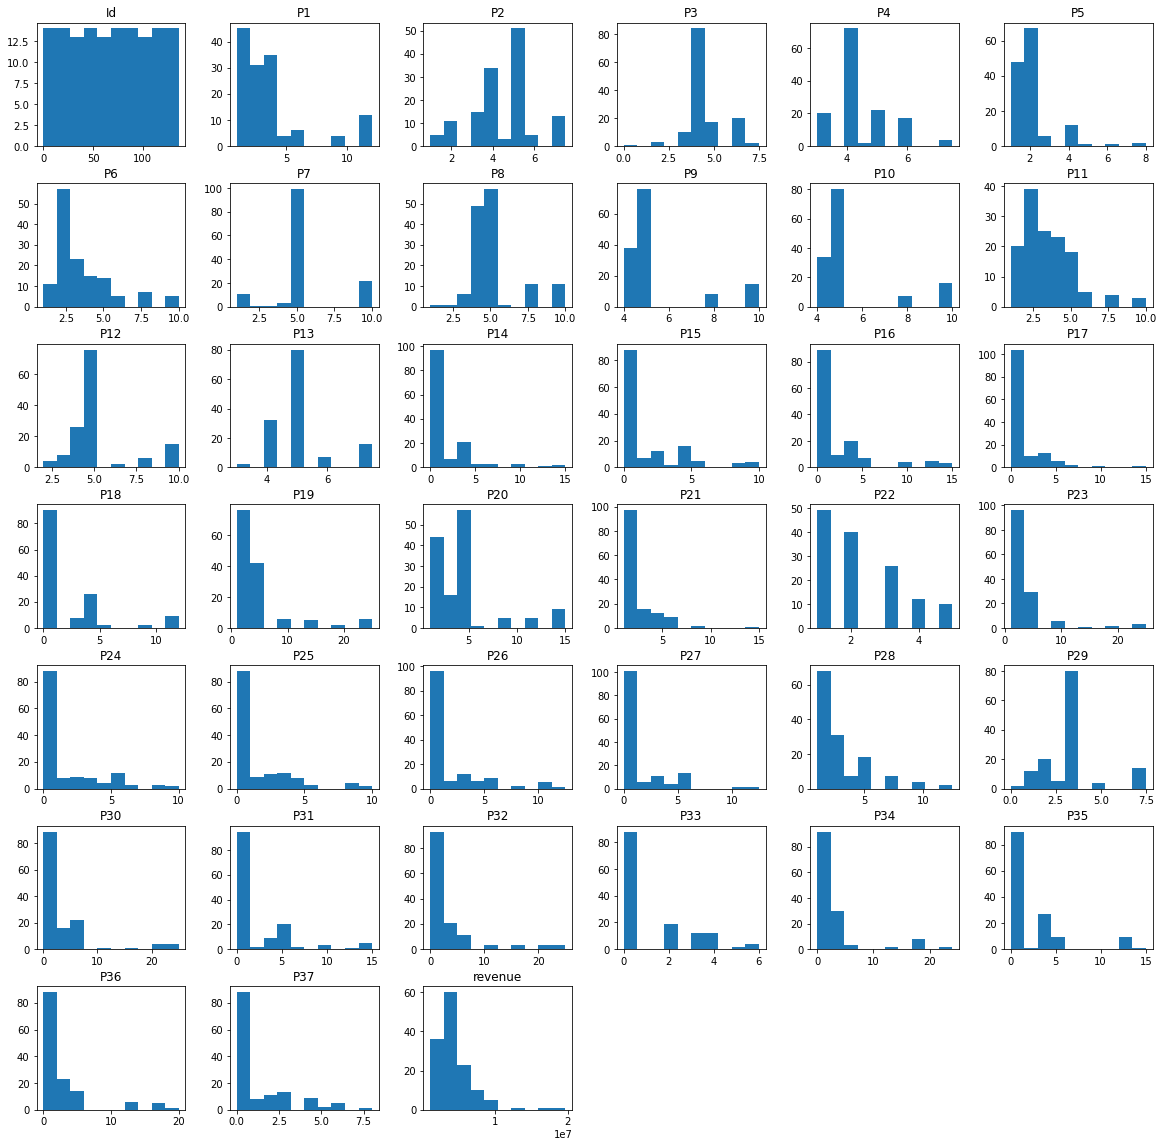

In [10]:
train.hist(figsize=(20,20), grid=False);

In [11]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d = ['City', 'City Group', 'Type']
for i in d:
    train[i] = le.fit_transform(train[i])

In [12]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [13]:
# Dependent and independent variables
X_train = train.iloc[:, 2:-1].values # Indepenedent variables
y_train = train.iloc[:, -1].values # Dependent variable

In [14]:
# Fitting the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
from sklearn.metrics import r2_score
r2_score(y_train, dtr.predict(X_train))

0.8877349009098654

In [16]:
# Predicting the testing data
test = pd.read_csv('test.csv')
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [18]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d = ['City', 'City Group', 'Type']
for i in d:
    test[i] = le.fit_transform(test[i])

In [19]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,38,1,1,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,27,1,2,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,3,0,1,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,26,1,2,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,1,1,1,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [20]:
# Predicting the data and storing as 'Predicted Revenue'
test['Predicted Revenue'] = dtr.predict(test.iloc[:, 2:].values)

In [21]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Predicted Revenue
0,0,01/22/2011,38,1,1,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,9262754.0
1,1,03/18/2011,27,1,2,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
2,2,10/30/2013,3,0,1,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,4067566.0
3,3,05/06/2013,26,1,2,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,5787594.0
4,4,07/31/2013,1,1,1,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,3810007.0
